In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns = ['custid','gender','age','income','score']

In [5]:
customerdf = df[['age','income','score']].copy()

In [28]:
train_data,test_data = train_test_split(customerdf,test_size=.2)
print(train_data.shape)
print(test_data.shape)

(160, 3)
(40, 3)


In [29]:
wcss = []
for k in range(1,11):
    print(f'training with {k} number of clusters')
    model = KMeans(n_clusters=k)
    model.fit(X=train_data)
    wcss.append(model.inertia_)

training with 1 number of clusters
training with 2 number of clusters
training with 3 number of clusters
training with 4 number of clusters
training with 5 number of clusters
training with 6 number of clusters
training with 7 number of clusters
training with 8 number of clusters
training with 9 number of clusters
training with 10 number of clusters


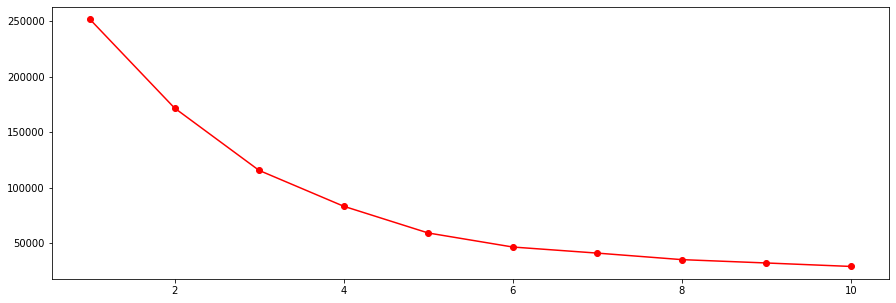

In [30]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11),wcss,'o-r')
plt.show()

In [41]:
model = KMeans(n_clusters=6)
model.fit(X=train_data)

KMeans(n_clusters=6)

In [42]:
preds = model.predict(test_data)

In [43]:
test_data_copy = test_data.copy()
test_data_copy['pred_cluster'] = preds

In [44]:
test_data_copy

,age,income,score,pred_cluster
167,33,86,95,1
120,27,67,56,5
14,37,20,13,0
78,23,54,52,5
35,21,33,81,2
86,55,57,58,4
116,63,65,43,4
157,30,78,78,1
153,38,78,76,1
100,23,62,41,5


In [45]:
px.scatter_3d(test_data_copy,x='age',y='income',z='score',color='pred_cluster')

In [47]:
customerdf['groups'] = model.predict(customerdf)

In [48]:
customerdf

,age,income,score,groups
0,19,15,39,0
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [50]:
px.scatter_3d(customerdf,x='age',y='income',z='score',color='groups')